In [ ]:
import openpyxl
from openpyxl.styles import Font
import os
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
import math
import copy
from math import dist
from scipy.signal import savgol_filter

In [ ]:
# read file

def read_data(all_xl, sheet_num):
  yaw_sheet = all_xl.worksheets[sheet_num]
  yaw = np.zeros(yaw_sheet.max_row - 1, dtype=float)
  acc_z = np.zeros(yaw_sheet.max_row - 1, dtype=float)

  # Quaternion
  q0 = np.zeros(yaw_sheet.max_row - 1, dtype=float)
  q1 = np.zeros(yaw_sheet.max_row - 1, dtype=float)
  q2 = np.zeros(yaw_sheet.max_row - 1, dtype=float)
  q3 = np.zeros(yaw_sheet.max_row - 1, dtype=float)

  for rowNum in range(2, yaw_sheet.max_row + 1, 1):
    yaw[rowNum - 2] = yaw_sheet.cell(rowNum, 15).value
    acc_z[rowNum - 2] = yaw_sheet.cell(rowNum, 11).value
    q0[rowNum - 2] = yaw_sheet.cell(rowNum, 19).value
    q1[rowNum - 2] = yaw_sheet.cell(rowNum, 18).value
    q2[rowNum - 2] = yaw_sheet.cell(rowNum, 17).value
    q3[rowNum - 2] = yaw_sheet.cell(rowNum, 16).value

  return yaw, acc_z, q0, q1, q2, q3

In [ ]:
# data continuity (PPT: p.45)

def translate(yaw_read):
  yaw_t = copy.deepcopy(yaw_read)
  for i in range(0, len(yaw_t) - 1):
    if(yaw_t[i] - yaw_t[i+1] > 4.5):
      yaw_t[i+1] += 2 * math.pi
    elif(yaw_t[i+1] - yaw_t[i] > 4.5):
      yaw_t[i+1] -= 2 * math.pi
  return yaw_t

In [ ]:
def draw_1(d):
  plt.figure(figsize=(15, 5))
  plt.plot(d, color = 'b')
  plt.xlabel("time (10ms)")
  plt.ylabel("yaw (rad)")
  plt.title("Chart of yaw value")
  plt.legend()
  plt.show()

In [ ]:
def draw_3(a, b, c):
  plt.figure(figsize=(15, 5))
  plt.plot(a, color = 'cyan')
  plt.plot(b, color = 'b')
  plt.plot(c, color = 'r')
  plt.legend()
  plt.yticks(ticks = mean)
  x_ticks = np.arange(0, len(a), 1000)
  plt.xticks(ticks = x_ticks)
  plt.xlabel("time (10ms)")
  plt.ylabel("yaw (rad)")
  plt.title("Chart of yaw value")
  plt.hlines(threshold, 0, len(a), color="gray")
  plt.hlines(mean, 0, len(a), color="magenta")
  #plt.grid()
  plt.show()

In [ ]:
# filter

def savgol(yaw, w, p):
  zhat = savgol_filter(yaw, w, p) # window size w, polynomial order p
  draw_2(yaw, zhat)
  print('mean = ', np.mean(zhat), ', max = ', np.max(zhat), ', min = ', np.min(zhat))
  return zhat

In [ ]:
def draw_2(a, b):
  plt.figure(figsize=(15, 5))
  plt.plot(a, color = 'deepskyblue', label = 'Before')
  plt.plot(b, color = 'palevioletred', label = 'After')
  plt.legend()
  plt.yticks(ticks = mean)
  x_ticks = np.arange(0, len(a), 5000)
  plt.xticks(ticks = x_ticks)
  plt.xlabel("time (s)")
  plt.ylabel("yaw (rad)")
  #plt.title("Chart of yaw value")
  # plt.hlines(threshold, 0, len(a), color="gray")
  plt.hlines(mean, 0, len(a), color="gray")
  #plt.grid()
  plt.show()

In [ ]:
# 不同yaw值對應不同方向
def orientation(zhat, threshold):
  ori = np.zeros(len(zhat))
  for i in range(len(zhat)):
    if zhat[i] < threshold[1] and zhat[i] > threshold[0]:
      ori[i] = 4
    elif zhat[i] < threshold[2] and zhat[i] > threshold[1]:
      ori[i] = 3
    elif zhat[i] < threshold[3] and zhat[i] > threshold[2]:
      ori[i] = 2
    elif zhat[i] < threshold[4] and zhat[i] > threshold[3]:
      ori[i] = 1
    elif zhat[i] < threshold[5] and zhat[i] > threshold[4]:
      ori[i] = 4
    elif zhat[i] < threshold[6] and zhat[i] > threshold[5]:
      ori[i] = 3
    elif zhat[i] < threshold[7] and zhat[i] > threshold[6]:
      ori[i] = 2
    elif zhat[i] < threshold[8] and zhat[i] > threshold[7]:
      ori[i] = 1
    elif zhat[i] < threshold[9] and zhat[i] > threshold[8]:
      ori[i] = 4
    elif zhat[i] < threshold[10] and zhat[i] > threshold[9]:
      ori[i] = 3
    elif zhat[i] < threshold[11] and zhat[i] > threshold[10]:
      ori[i] = 2
    elif zhat[i] < threshold[12] and zhat[i] > threshold[11]:
      ori[i] = 1
    elif zhat[i] < threshold[13] and zhat[i] > threshold[12]:
      ori[i] = 4
    elif zhat[i] < threshold[14] and zhat[i] > threshold[13]:
      ori[i] = 3
    elif zhat[i] < threshold[15] and zhat[i] > threshold[14]:
      ori[i] = 2
return ori

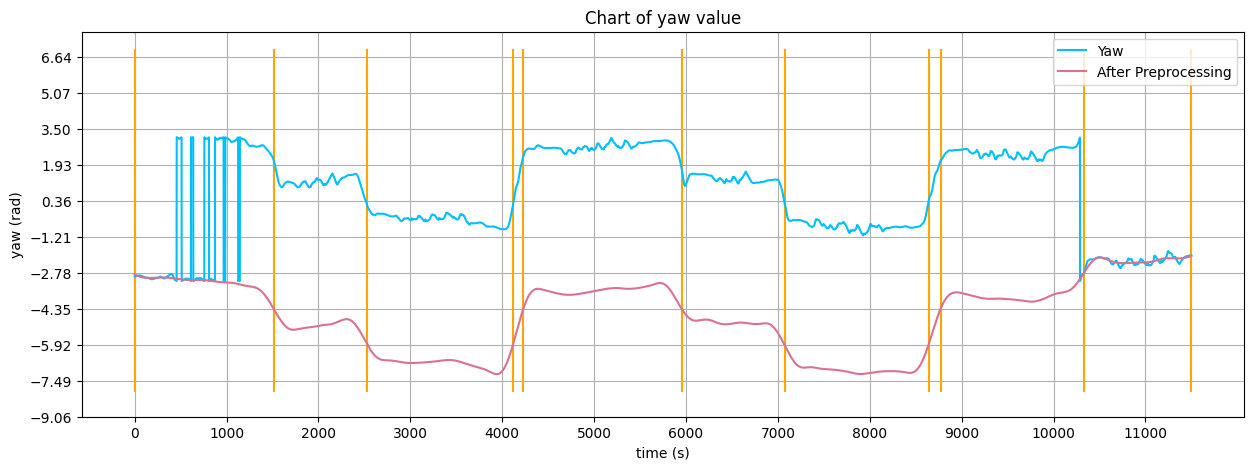

In [ ]:
def draw_ori(acc, t, yaw1, zhatt):
  plt.figure(figsize=(15, 5))
  plt.title("Chart of yaw value")
  #plt.plot(yaw2, color = 'gray', label = 'Before filter')
  t.append(len(acc))
  plt.vlines(t, -8, 7, color = "orange") #所有換方向的時間點
  #plt.plot(acc, color = 'green', label = 'Acceleration')
  plt.plot(yaw1, color = 'deepskyblue', label = 'Yaw')
  plt.plot(zhatt, color = 'palevioletred', label = 'After Preprocessing')
  plt.legend()
  plt.yticks(ticks = threshold[1:-4])
  x_ticks = np.arange(0, len(zhat), 1000)
  plt.xticks(ticks = x_ticks)
  plt.xlabel("time (10ms)")
  plt.ylabel("yaw (rad)")
  plt.grid()
  plt.show()

In [ ]:
def count(acc, s, threshold, time_interval, idx, distx, disty, orientation):
  step_count = 0

  max_index_all = argrelextrema(acc, np.greater)[0]
  min_index_all = argrelextrema(acc, np.less)[0]
  max_index = []
  min_index = []

  max_candidate = []
  for m in max_index_all:
    if acc[m] > threshold :
      max_candidate.append(m)
  j = 0
  while j < len(max_candidate):
    j_candidate = []
    j_candidate.append(max_candidate[j])
    for k in range(j + 1, len(max_candidate)):
      if max_candidate[k] - max_candidate[j] < time_interval:
        j_candidate.append(max_candidate[k])
    max_value = 0
    max_value_index = 0
    # print(j_candidate)
    for c in j_candidate:
      if acc[c] > max_value:
        max_value = acc[c]
        max_value_index = c
    max_index.append(max_value_index)
    step_count = step_count + 1
    j = j + len(j_candidate)

  for m in max_index:
      min_candidate = []
      for n in min_index_all:
        if n > m and n < m + 31:
          min_candidate.append(n)
      min_value = 0
      min_value_index = 0
      for c in min_candidate:
        if acc[c] < min_value:
          min_value = acc[c]
          min_value_index = c
      min_index.append(min_value_index)
  print('step_count = ', step_count)
  draw_c(acc, max_index, min_index, idx, step_count)
  dist = len_estimate(acc, max_index, min_index, s)

  # 根據方向調整x, y座標
  if orientation == 1:
    disty -= dist
  if orientation == 2:
    distx += dist
  if orientation == 3:
    disty += dist
  if orientation == 4:
    distx -= dist
  return distx, disty

In [ ]:
def draw_c(acc, max_index, min_index, idx, step_count):
  plt.figure(figsize=(15, 8))
  plt.title("Index: " + str(idx) + ", step: " + str(step_count))
  plt.xlabel("time (s)")
  plt.ylabel("Z-axis acceleration (m/s²)")
  plt.plot(acc)
  plt.scatter(max_index, acc[max_index], c='red')
  plt.scatter(min_index, acc[min_index], c='orange')

In [ ]:
def len_estimate(acc, max_index, min_index, s):
  #estimate = pow(acc[max_index], 1/2) * s
  estimate = pow(acc[max_index] - acc[min_index], 1 / 4) * s
  print(np.sum(estimate))

  return np.sum(estimate)

In [ ]:
# main

# input file
folder = '/content/drive/MyDrive/'
all_xl = openpyxl.load_workbook(folder + '0521-1-Accelerometer_ECS.xlsx')

# 設定plt圖表y軸
mean = np.zeros(16)
mean[0] = -9.85
for i in range(15):
  mean[i+1] = mean[i] + (math.pi / 2)
mean = mean.tolist()
threshold = []
for m in mean:
  threshold.append(m - (math.pi / 4))

# read file
yaw1, acc, a, b, c, d = read_data(all_xl, 0)

# data continuity
yaw2 = translate(yaw1)

# filter
zhatt = savgol(yaw2, 300, 3)
zhatt = savgol(zhatt, 500, 3)
draw_3(acc, yaw1, zhatt)

# 方向校正
zhat = zhatt + 1.57

# 方向判斷
ori = orientation(zhat, threshold)

# 紀錄換方向的時間點
t = [] # 換方向的時間點
y = [] # y[i] = t[i]的方向
y.append(int(ori[0]))
t.append(int(0))
j = 0
for i in range(1, ori.size):
  if ori[i] != y[j]:
    j = j + 1
    y.append(int(ori[i]))
    t.append(int(i))
draw_ori(acc, t, yaw1, zhatt)

# 如果方向一直變，代表在轉彎，只會計一次方向變化
turn_threshold = 150
turn_ori = np.zeros(len(zhat))
for i in range(len(zhat)):
  turn_ori[i] = ori[i]
for i in range(1, len(t) - 2):
  if t[i+1] - t[i] < turn_threshold:
    for j in range(t[i], t[i+1]):
      turn_ori[j] = 0
for i in range(len(zhat) - 2, 0, -1):
  if turn_ori[i] == 0:
    turn_ori[i] = turn_ori[i+1]
t_2 = [] # 換方向的時間點
y_2 = [] # y_2[i] = t_2[i]的方向
y_2.append(int(turn_ori[0]))
t_2.append(int(0))
j = 0
for i in range(1, turn_ori.size):
  if int(turn_ori[i]) != int(y_2[j]):
    #print(turn_ori[i], y_2[j])
    j = j + 1
    y_2.append(int(turn_ori[i]))
    t_2.append(int(i))
draw_ori(acc, t_2, yaw1, zhatt)

In [ ]:
# main_2

# 參數設定
cut = 100 # 設定轉彎的時間點前後一秒還在轉彎，這段時間內不會計算距離
threshold = 1.75 # step threshold
time_interval = 35
s = 38.1 # step parameter
# 起點的座標
start_distx = 600
start_disty = 600
# 終點的座標
end_distx = 0
end_disty = 0
# 起點和終點的時間點(在t_2的index)
start = 19
end = 21

# 實際計算(without turn correction)
distx = start_distx
disty = start_disty
for i in range(start, end):
  distx, disty = count(acc[t_2[i]+cut:t_2[i+1]-cut], s, threshold, time_interval, i+1, distx, disty, turn_ori[t_2[i]])
  print('ori = ', int(turn_ori[t_2[i]]), ', zhat = ', zhat[t_2[i]])
  print(int(distx), int(disty)) # 目前的座標
  print()
print(dist([distx, disty], [end_distx, end_disty])) # 計算出的座標和ground truth的距離

600 600
step_count =  10
610.843601678067
ori =  4 , zhat =  -2.7861483160681857
-10 600

0 600
step_count =  10
604.236043940692
ori =  1 , zhat =  -4.357540130799836
0 -4

4.236043940691957


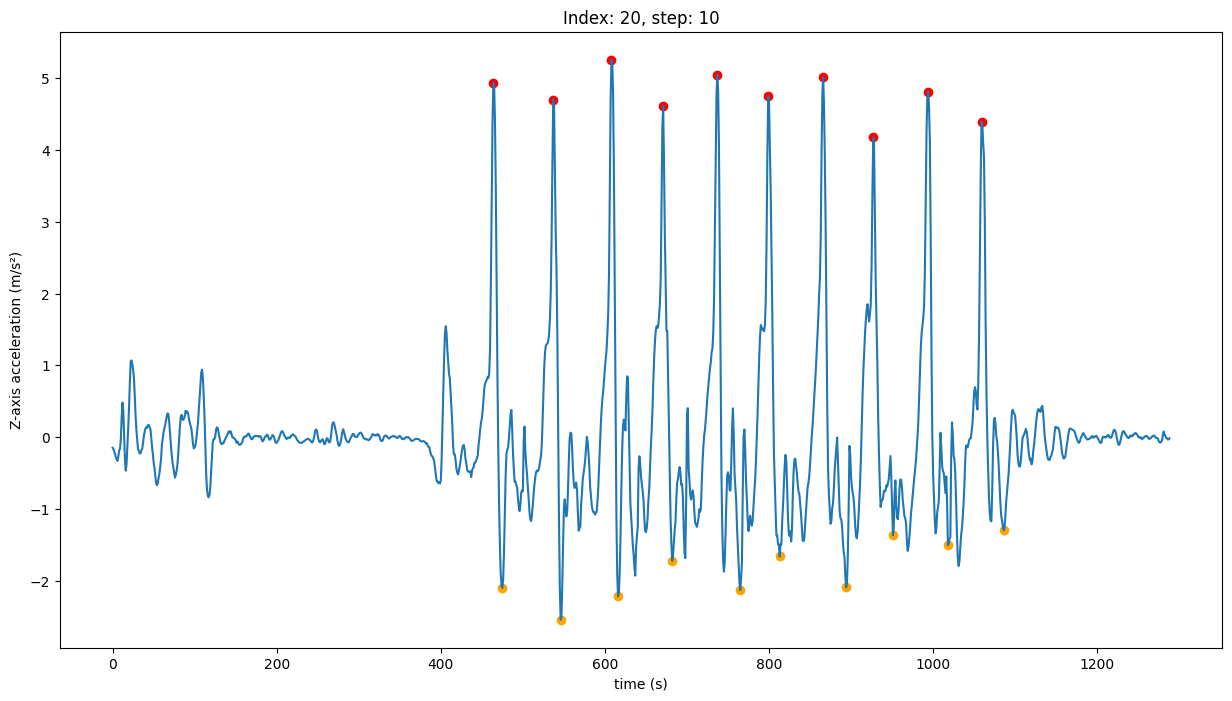

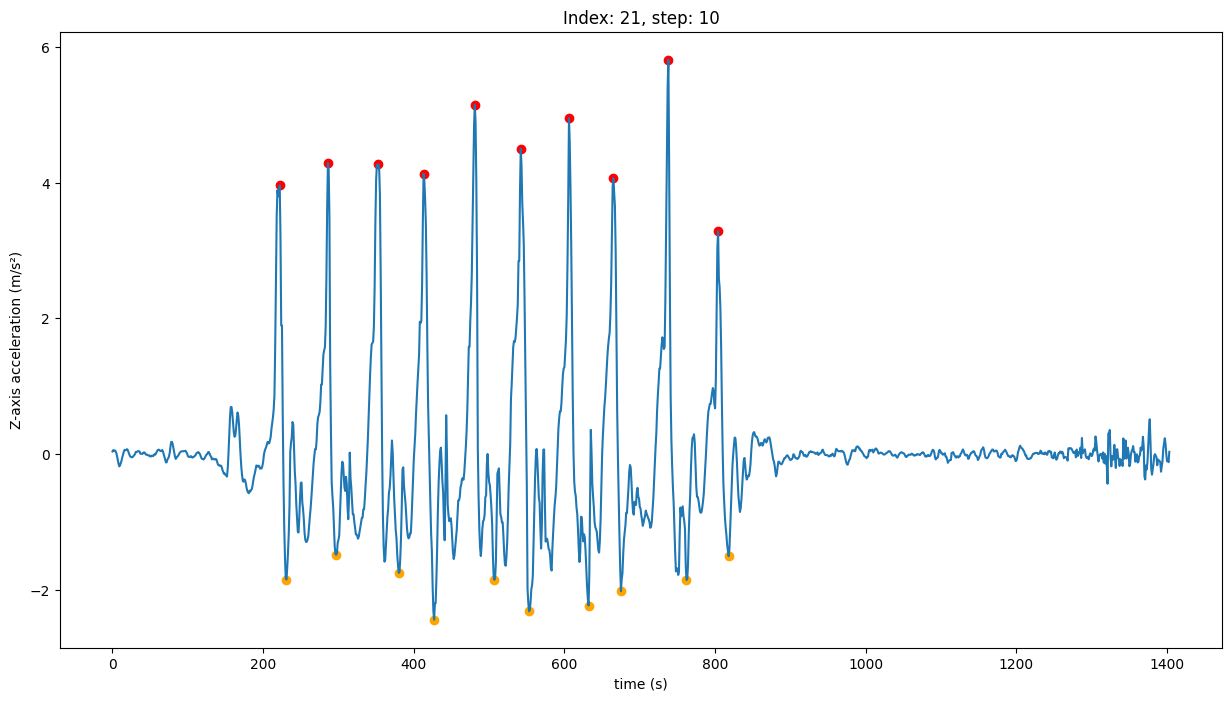

In [ ]:
# turn correction (PPT: p.56)
corner = [[0, 0], [0, 600], [300, 0], [300, 600], [600, 0], [600, 600]]
distx = start_distx
disty = start_disty
for i in range(start, end):
  min_dis = 900
  min_dis_corner = -1
  for j in range(len(corner)):
    distance = dist(corner[j] , [distx, disty])
    if(distance < min_dis):
      min_dis = distance
      min_dis_corner = j
  distx = corner[min_dis_corner][0]
  disty = corner[min_dis_corner][1]
  print(int(distx), int(disty))
  distx, disty = count(acc[t_2[i]+cut:t_2[i+1]-cut], s, threshold, time_interval, i+1, distx, disty, turn_ori[t_2[i]])
  print('ori = ', int(turn_ori[t_2[i]]), ', zhat = ', zhat[t[i]])
  print(int(distx), int(disty))
  print()
print(dist([distx, disty], [end_distx, end_disty]))